## Basic Areas Tutorial
<a target="_blank" href="https://colab.research.google.com/github/VirtualBrainLab/urchin-examples/blob/colab/basics/areas.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Install Urchin

Urchin is a Python package stored on PyPI, the following code needs to be run the first time you use Urchin in a Python environment. 

Urchin's full documentation can be found [on our website](https://virtualbrainlab.org/urchin/installation_and_use.html).

In [1]:
#Installing urchin
!pip install oursin -U

## Setup Urchin and open the renderer webpage 

By default Urchin opens the 3D renderer in a webpage. Make sure pop-ups are enabled, or the page won't open properly. You can also open the renderer site yourself by replace [ID here] with the ID that is output by the call to `.setup()`  https://data.virtualbrainlab.org/Urchin/?ID=[ID here]

Note that Urchin communicates to the renderer webpage through an internet connection, we don't currently support offline use (we hope to add support in the future).

In [1]:
import oursin as urchin
urchin.setup(localhost=True)

(URN) connected to server
Login sent with ID: 2d65a4f2, copy this ID into the renderer to connect.


c:\Users\Dan\anaconda3\envs\iblenv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Dan\anaconda3\envs\iblenv\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Dan\anaconda3\envs\iblenv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Loading a reference atlas and displaying brain areas

Multiple reference atlases are available in Urchin, before we can access individual brain areas we need to have an atlas loaded. Here we'll load the Allen Mouse CCF atlas.

Only one atlas can be loaded at a time.

In [ ]:
urchin.ccf25.load()

An Atlas stores a list of areas, which can be loaded in the renderer

In [2]:
print(urchin.ccf25.areas)
urchin.ccf25.root.set_visibility(True)

['root', 'grey', 'CH', 'CTX', 'CTXpl', 'Isocortex', 'FRP', 'FRP1', 'FRP2/3', 'FRP5', 'FRP6a', 'FRP6b', 'MO', 'MOp', 'MOp1', 'MOp2/3', 'MOp5', 'MOp6a', 'MOp6b', 'MOs', 'MOs1', 'MOs2/3', 'MOs5', 'MOs6a', 'MOs6b', 'SS', 'SSp', 'SSp-n', 'SSp-n1', 'SSp-n2/3', 'SSp-n4', 'SSp-n5', 'SSp-n6a', 'SSp-n6b', 'SSp-bfd', 'SSp-bfd1', 'SSp-bfd2/3', 'SSp-bfd4', 'SSp-bfd5', 'SSp-bfd6a', 'SSp-bfd6b', 'SSp-ll', 'SSp-ll1', 'SSp-ll2/3', 'SSp-ll4', 'SSp-ll5', 'SSp-ll6a', 'SSp-ll6b', 'SSp-m', 'SSp-m1', 'SSp-m2/3', 'SSp-m4', 'SSp-m5', 'SSp-m6a', 'SSp-m6b', 'SSp-ul', 'SSp-ul1', 'SSp-ul2/3', 'SSp-ul4', 'SSp-ul5', 'SSp-ul6a', 'SSp-ul6b', 'SSp-tr', 'SSp-tr1', 'SSp-tr2/3', 'SSp-tr4', 'SSp-tr5', 'SSp-tr6a', 'SSp-tr6b', 'SSp-un', 'SSp-un1', 'SSp-un2/3', 'SSp-un4', 'SSp-un5', 'SSp-un6a', 'SSp-un6b', 'SSs', 'SSs1', 'SSs2/3', 'SSs4', 'SSs5', 'SSs6a', 'SSs6b', 'GU', 'GU1', 'GU2/3', 'GU4', 'GU5', 'GU6a', 'GU6b', 'VISC', 'VISC1', 'VISC2/3', 'VISC4', 'VISC5', 'VISC6a', 'VISC6b', 'AUD', 'AUDd', 'AUDd1', 'AUDd2/3', 'AUDd4', 'A

Throughout this tutorial, we'll use the screenshot function on the main camera to see what effect we had on the scene. Note that because taking screenshots requires waiting for data to come back, you need to use the Python `await` keyword.

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


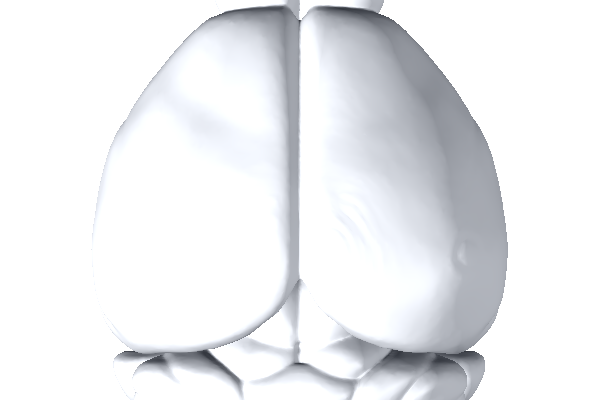

In [5]:
await urchin.camera.main.screenshot(size=[600,400])

Areas have a bit of metadata as well

In [ ]:
print(urchin.ccf25.root.name)
print(urchin.ccf25.root.acronym)
print(urchin.ccf25.root.id)
print(urchin.ccf25.root.color)

root
root
997
#FFFFFF


You might not want to load areas with their default color or material, you can set your own color, material, and alpha overrides.

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


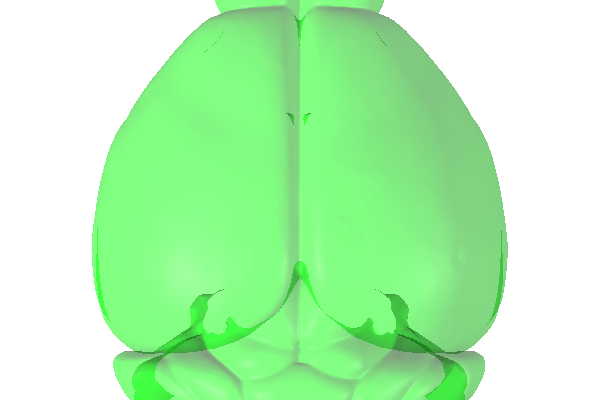

In [6]:
# load a single area
urchin.ccf25.root.set_color('#00ff00')
urchin.ccf25.root.set_material('transparent-lit')
urchin.ccf25.root.set_alpha(0.5)
await urchin.camera.main.screenshot(size=[600,400])

You can also clear the atlas off of the screen. It will remain loaded in the background.

In [7]:
urchin.ccf25.clear()

You can use the `sided` input parameter for any of the area functions to load a single hemisphere.

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


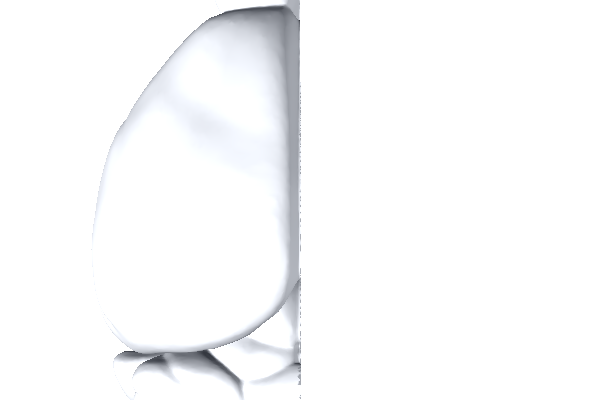

In [9]:
# load just left hemisphere
urchin.ccf25.root.set_visibility(True, sided='left')
await urchin.camera.main.screenshot(size=[600,400])

In [10]:
urchin.ccf25.clear()

If you have a large set of areas that you need to control, use the `get_areas` function to get access to all of them at once. We include a set of 'plural' functions attached to the Atlas object, which are easier to use with a list of areas.

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


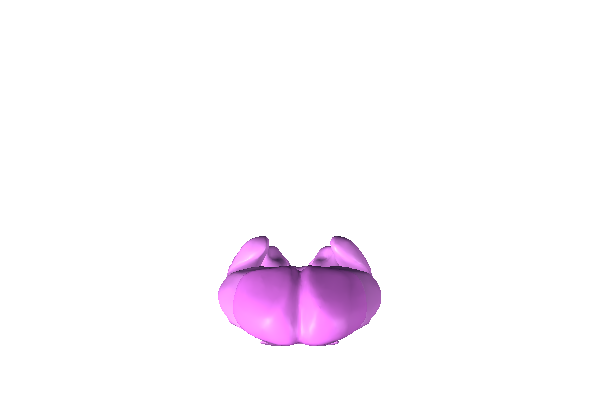

In [12]:
area_list = urchin.ccf25.get_areas(["MRN", "SCs", "SCm", "APN", "RN"])

urchin.ccf25.set_visibilities(area_list, True)
await urchin.camera.main.screenshot(size=[600,400])

In [13]:
urchin.ccf25.clear()

Each Atlas includes a set of "default" areas. These are the highest regions in the ontology hierarchy that split the brain into major areas. Loading the defaults can be useful to create a clean visualization of the whole brain where major areas are clearly segmented.

Loading the defaults loads the left and right hemispheres separately, this is so that you can easily use the "explode" feature to pull brain regions apart. This does mean that if you want to set the materials, colors, etc, you need to use `sided='left'` or `sided='right'` 

In [14]:
urchin.ccf25.load_defaults()

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


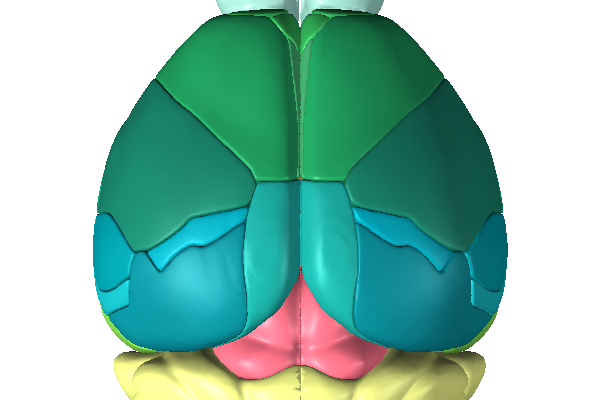

In [15]:
await urchin.camera.main.screenshot(size=[600,400])